In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method

In [2]:
df = pd.read_csv('Marketing_data.csv')

In [3]:
df.shape

(8950, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
df.CASH_ADVANCE.max()

47137.21176

In [7]:
df[df['CASH_ADVANCE'] == 47137.21176]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


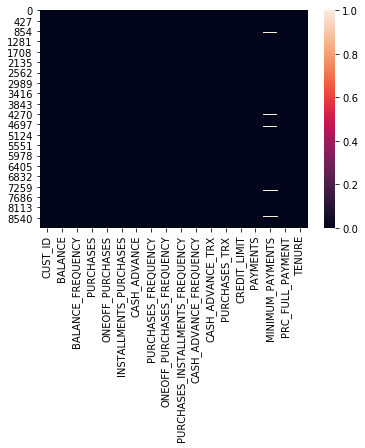

In [8]:
sns.heatmap(df.isnull());

In [9]:
#Substituindo valores nulos pela media dos valores
df.loc[(df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].mean()

In [10]:
df.loc[(df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = df['CREDIT_LIMIT'].mean()

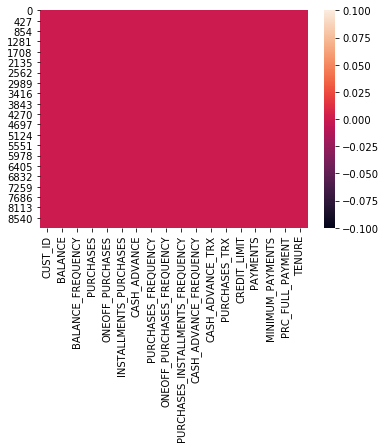

In [11]:
sns.heatmap(df.isnull());

In [12]:
df.drop('CUST_ID', axis=1, inplace=True)

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

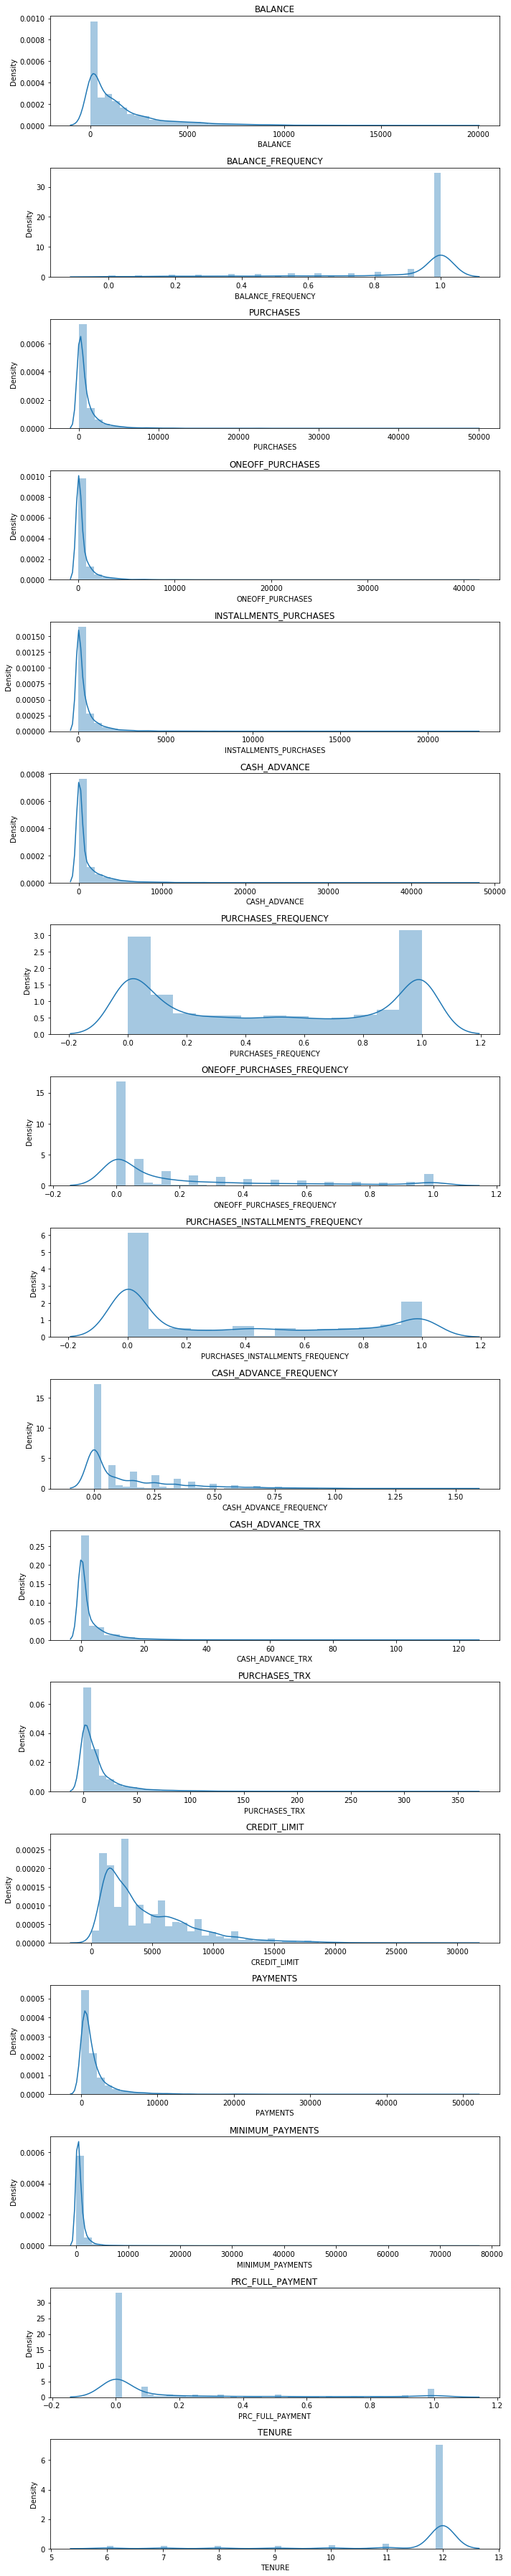

In [13]:
plt.figure(figsize=(10,50))
for i in range(len(df.columns)):
  plt.subplot(17, 1, i + 1)
  sns.distplot(df[df.columns[i]], kde = True)
  plt.title(df.columns[i])
plt.tight_layout();

In [14]:
correlacoes = df.corr()

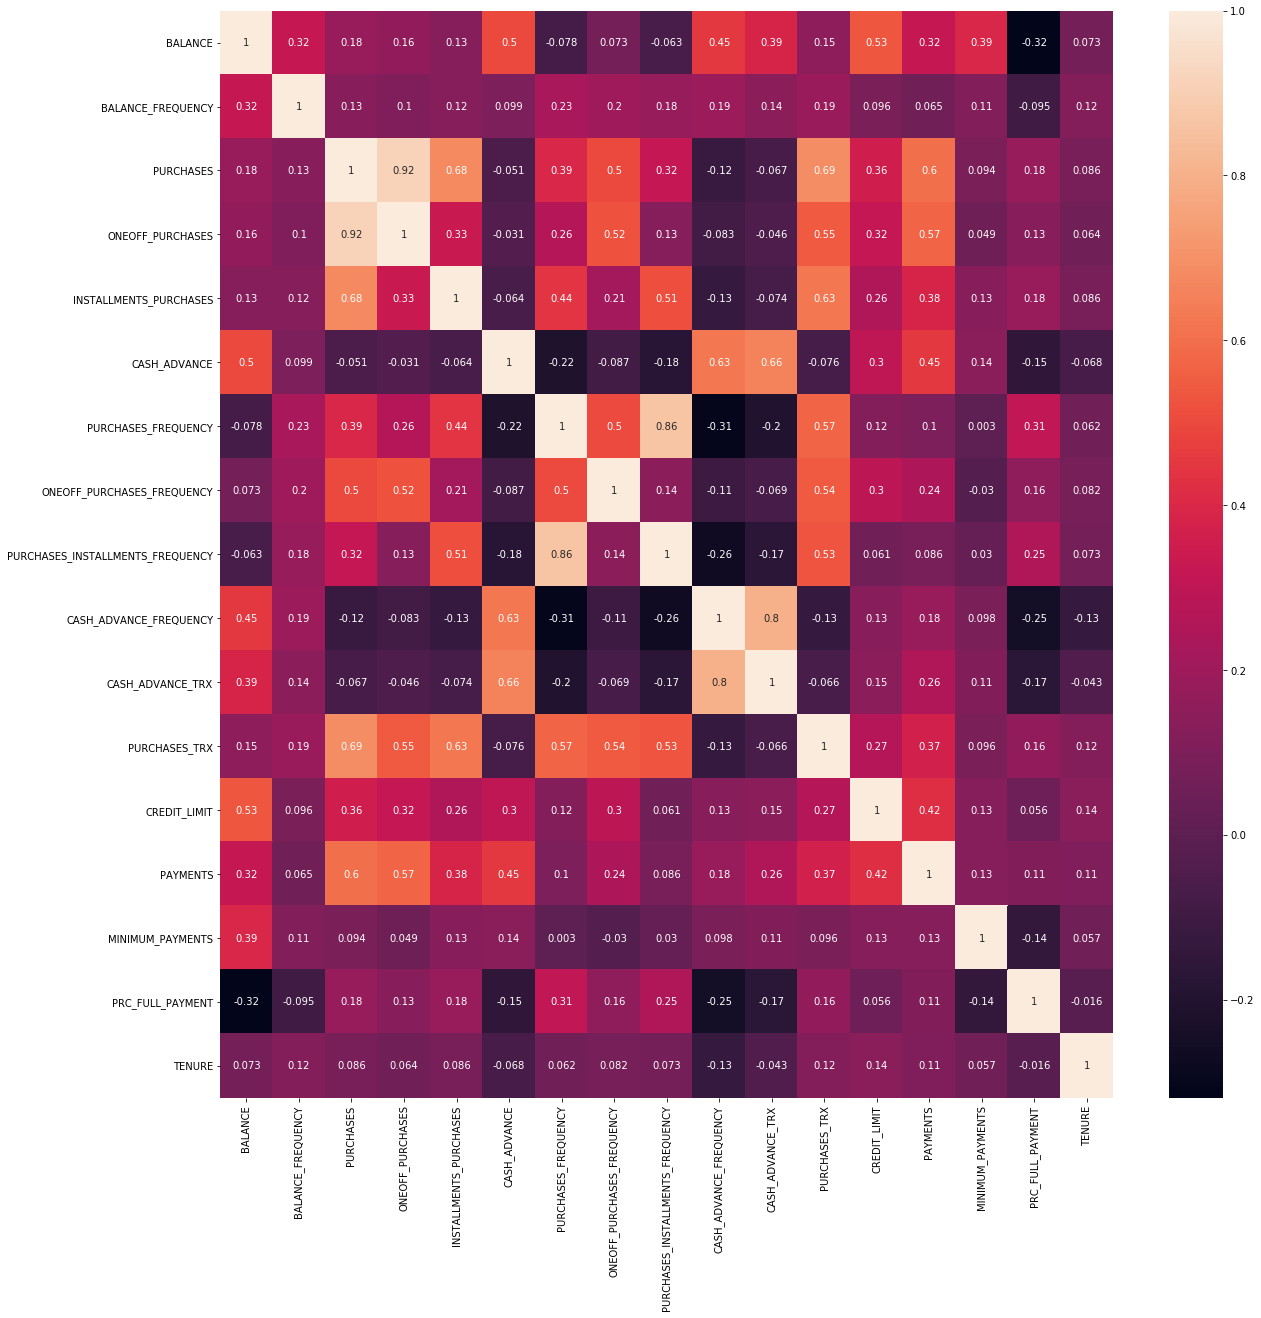

In [15]:
f, ax= plt.subplots(figsize=(20,20))
sns.heatmap(correlacoes, annot=True)

In [16]:
#Usar quando houver muitos outliers
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [17]:
wcss_1 = []
range_values = range(1,10)
for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_scaled)
    wcss_1.append(kmeans.inertia_)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/srv/conda/envs/notebook/lib/python3.7/site-

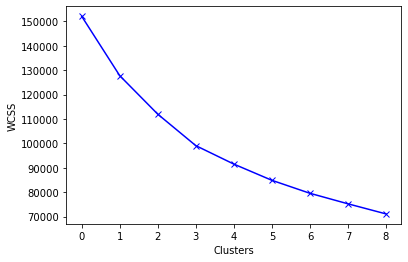

In [18]:
plt.plot(wcss_1, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

In [19]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(df_scaled)
labels = kmeans.labels_

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/srv/conda/envs/notebook/lib/python3.7/site-

In [20]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.130836,0.400422,0.543676,0.673002,0.048906,-0.329329,0.982989,1.906374,0.175606,-0.412822,-0.330583,0.621158,0.438972,0.149362,-0.157871,0.449251,0.268361
1,0.007386,0.403752,-0.356006,-0.240946,-0.399002,-0.103191,-0.847154,-0.390972,-0.751266,0.089584,-0.037849,-0.479959,-0.307799,-0.253804,-0.007918,-0.456181,0.274208
2,1.658975,0.391538,-0.223324,-0.158361,-0.237174,1.994607,-0.488580,-0.215263,-0.427607,1.915289,1.913440,-0.274164,1.008849,0.806635,0.501744,-0.391308,0.073409
3,-0.701156,-2.141864,-0.310042,-0.234481,-0.302190,-0.322278,-0.554257,-0.441662,-0.439875,-0.521373,-0.376227,-0.419176,-0.175531,-0.201248,-0.256888,0.285221,0.202366
4,-0.365062,0.331879,-0.033621,-0.241952,0.364822,-0.362336,0.995953,-0.382317,1.208170,-0.472746,-0.359789,0.190413,-0.258830,-0.213513,-0.051385,0.319058,0.255843
5,1.819469,0.301643,12.207777,12.296446,6.272587,0.242957,1.002411,2.032081,0.866148,-0.392172,-0.124384,4.369530,3.261192,8.782991,1.003073,1.152351,0.300900
6,1.058960,0.468667,2.451528,1.789389,2.509252,-0.160280,1.169158,1.548079,1.279521,-0.283467,-0.150662,3.110496,1.279403,1.418574,0.739832,0.235656,0.337720
7,-0.334592,-0.350524,-0.288489,-0.214652,-0.287412,0.067364,-0.204978,-0.287181,-0.226363,0.308493,0.000348,-0.388193,-0.562451,-0.393054,-0.208753,0.012516,-3.199775


In [21]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1292.149808,0.972127,2164.776124,1709.482945,455.293178,288.253621,0.884872,0.771166,0.434228,0.052534,0.992838,30.149508,6091.609018,2165.531590,496.294252,0.285113,11.876455
1,1579.848310,0.972916,242.591557,192.516463,50.255182,762.474719,0.150347,0.085823,0.065865,0.153071,2.990539,2.779840,3374.551189,998.405102,845.754022,0.020289,11.884279
2,5017.490466,0.970022,526.069459,329.590316,196.593766,5161.655341,0.294260,0.138241,0.194495,0.518413,16.306652,7.895152,8165.055857,4068.274502,2033.498791,0.039264,11.615558
3,105.078620,0.369883,340.796153,203.246381,137.801297,303.039764,0.267900,0.070701,0.189620,0.030812,0.681356,4.290678,3855.796139,1150.551244,265.539533,0.237137,11.788136
4,804.629675,0.955890,931.372891,190.845851,740.971458,219.034891,0.890075,0.088405,0.844595,0.040543,0.793532,19.442786,3552.721494,1115.044153,744.455750,0.247034,11.859701
5,5351.546106,0.948727,27085.309200,21002.018800,6083.290400,1488.363253,0.892667,0.808667,0.708667,0.056667,2.400000,123.320000,16360.000000,27159.043527,3201.825604,0.490758,11.920000
6,3768.611102,0.988294,6240.933240,3562.456034,2680.153184,642.756860,0.959590,0.664280,0.872952,0.078420,2.220670,92.025140,9149.441341,5839.776004,2588.354948,0.222640,11.969274
7,868.050123,0.794235,386.843712,236.159280,151.164432,1120.136414,0.408083,0.116786,0.274475,0.196877,3.251200,5.060800,2448.023119,595.290996,377.716763,0.157375,7.235200


In [22]:
df_cluster = pd.concat([df, pd.DataFrame({'cluster': labels})], axis = 1)


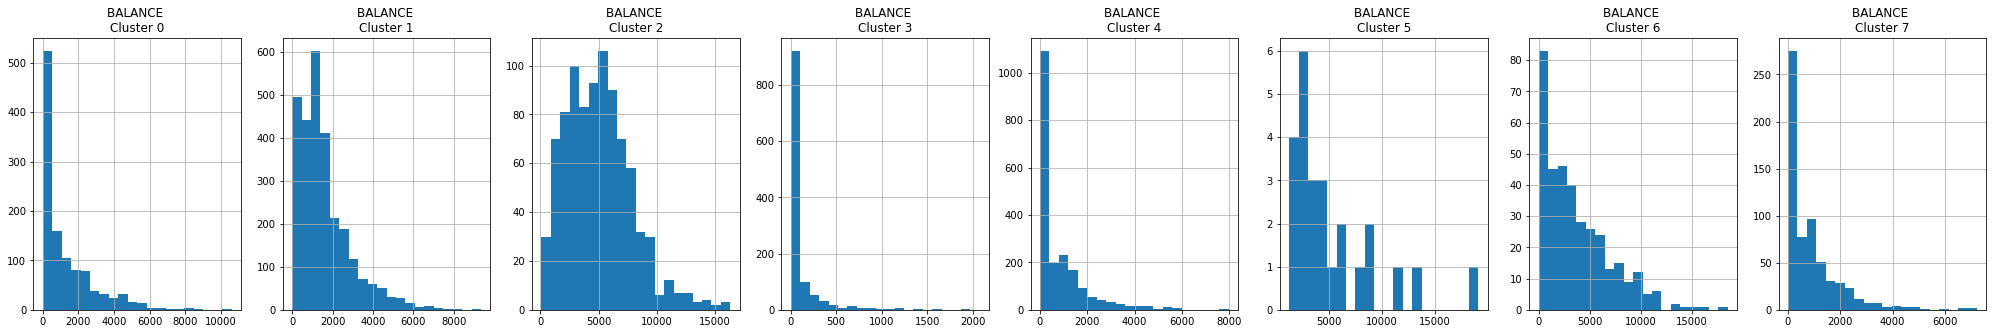

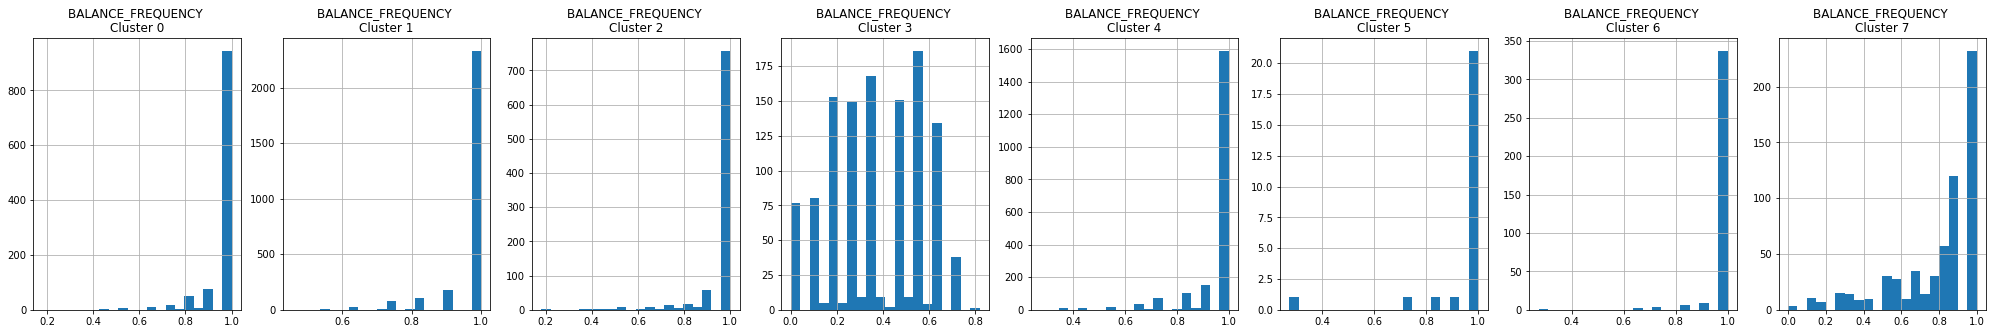

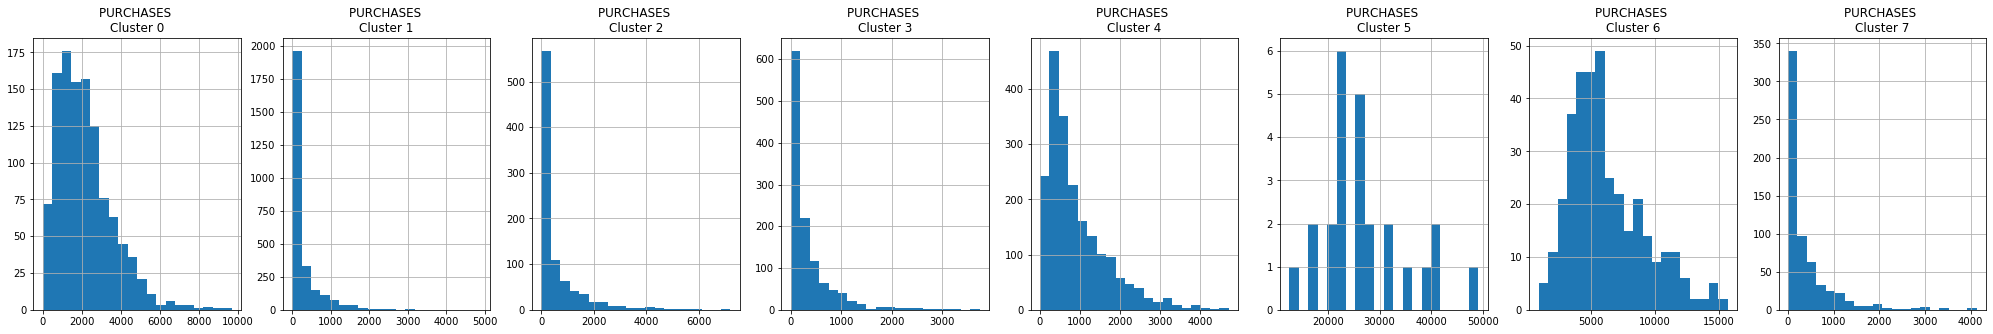

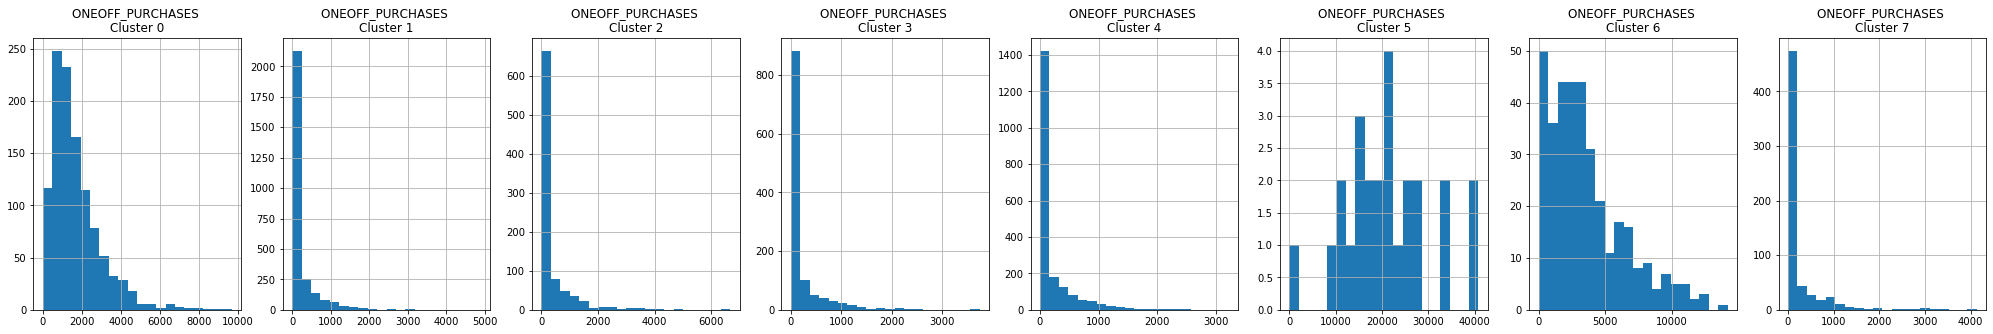

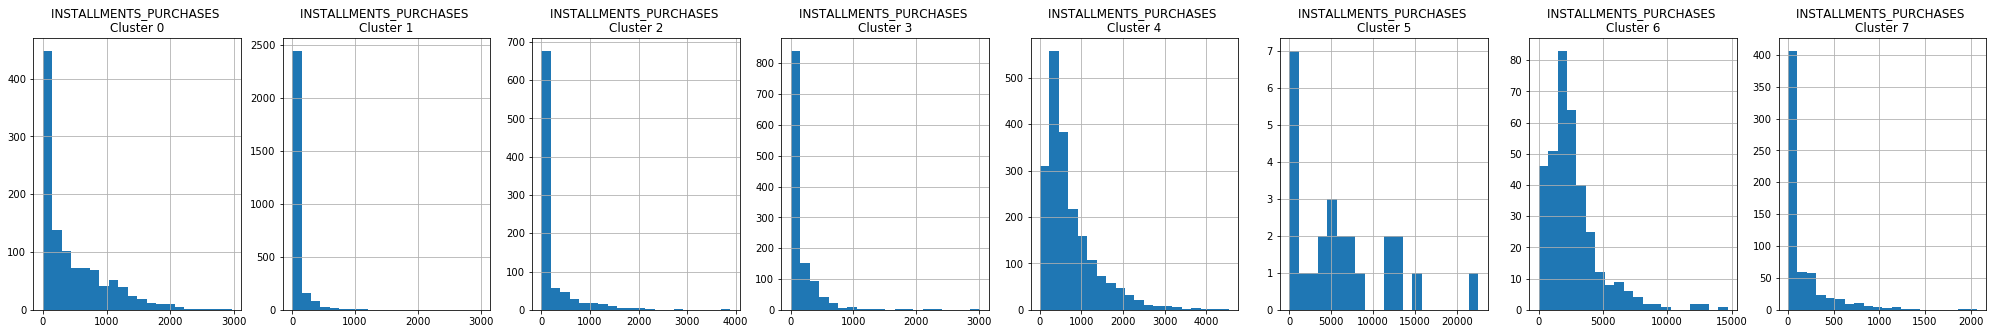

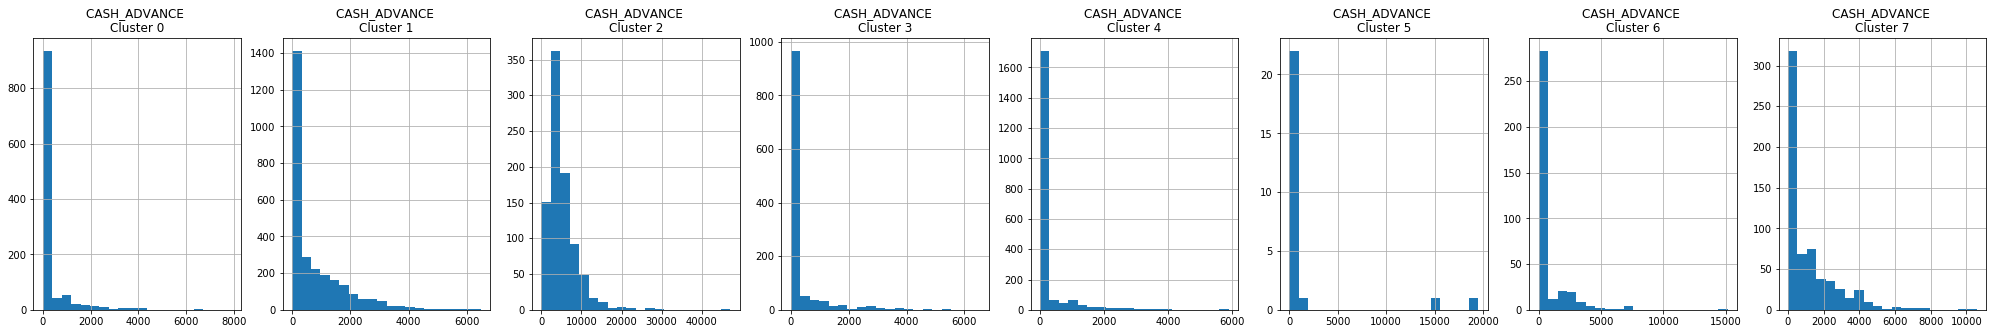

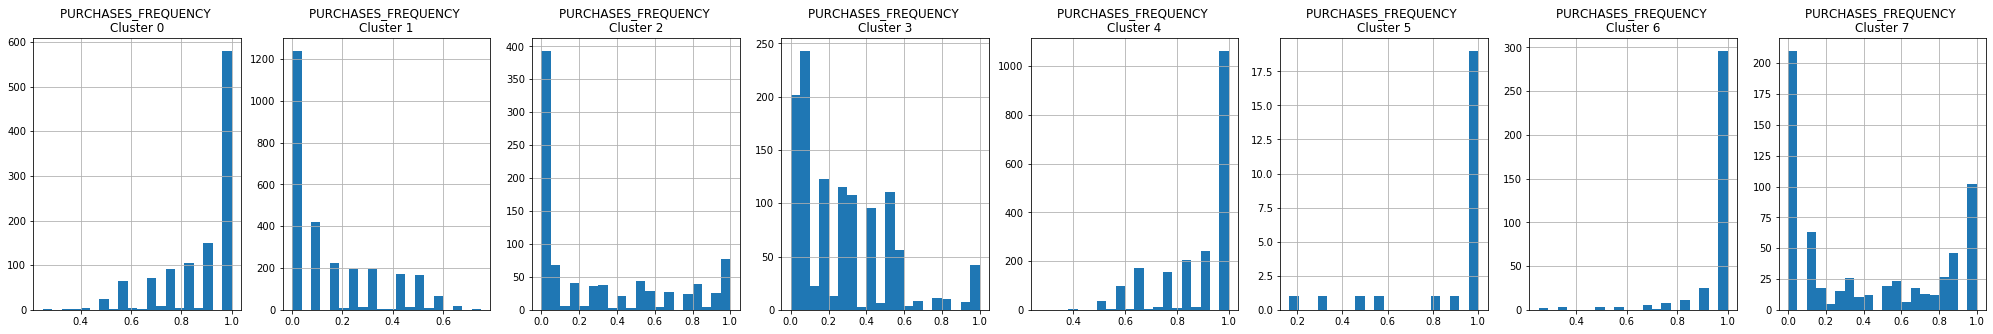

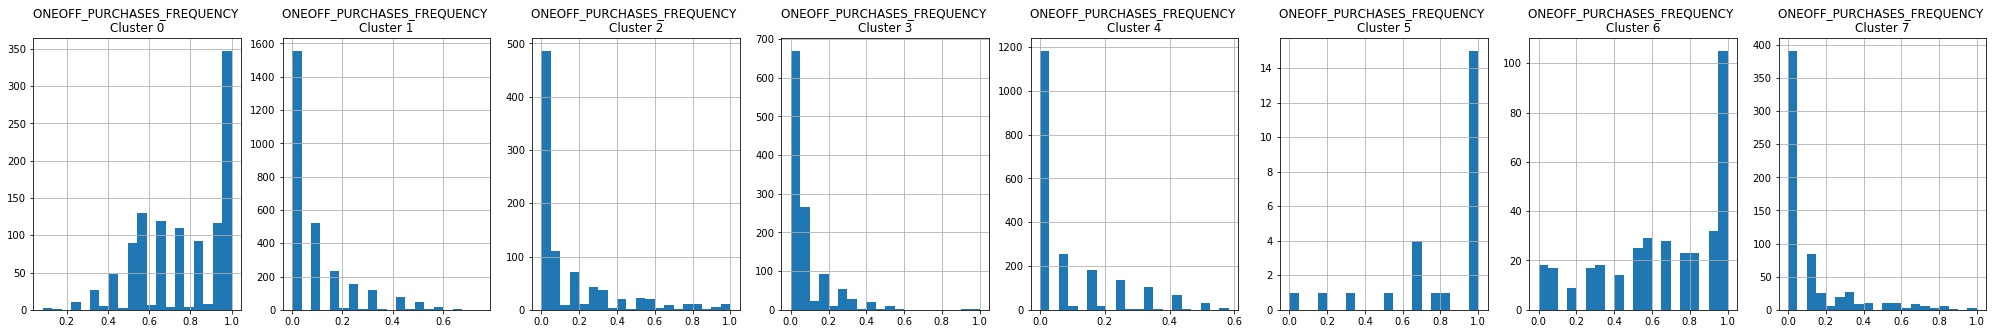

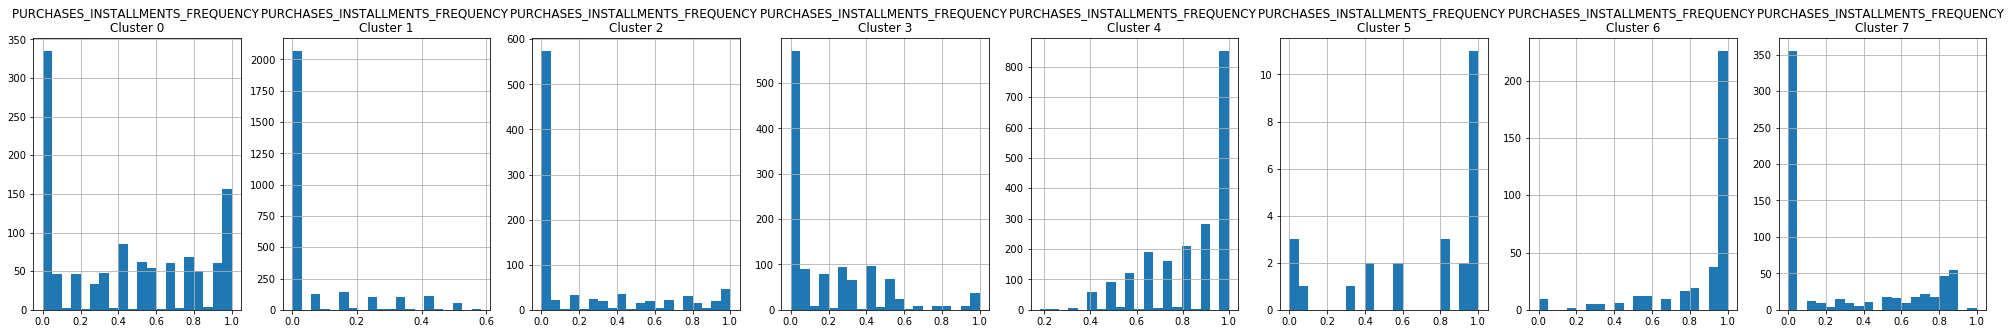

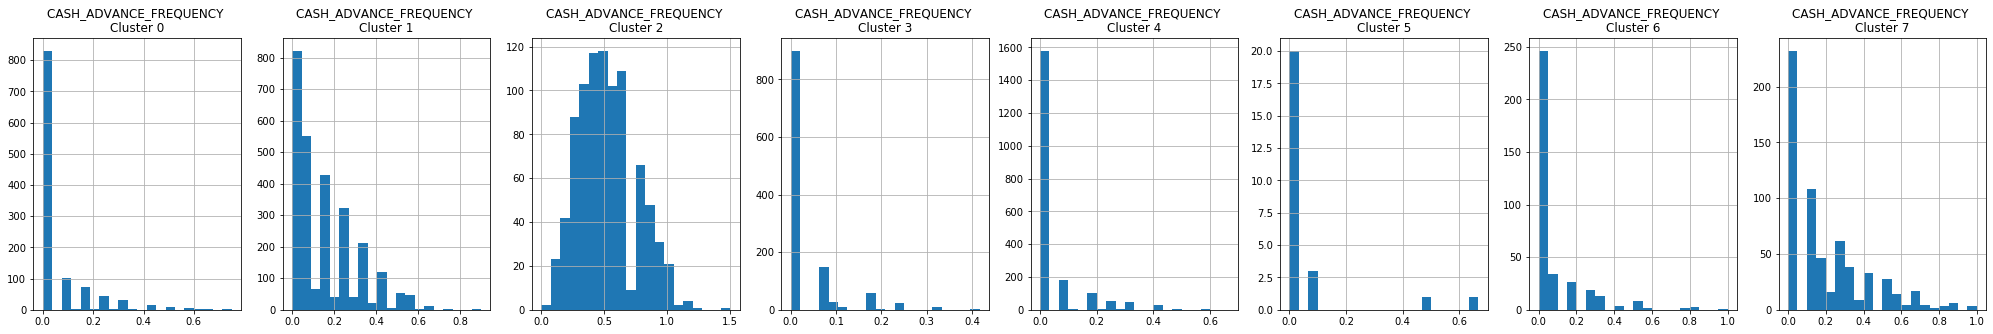

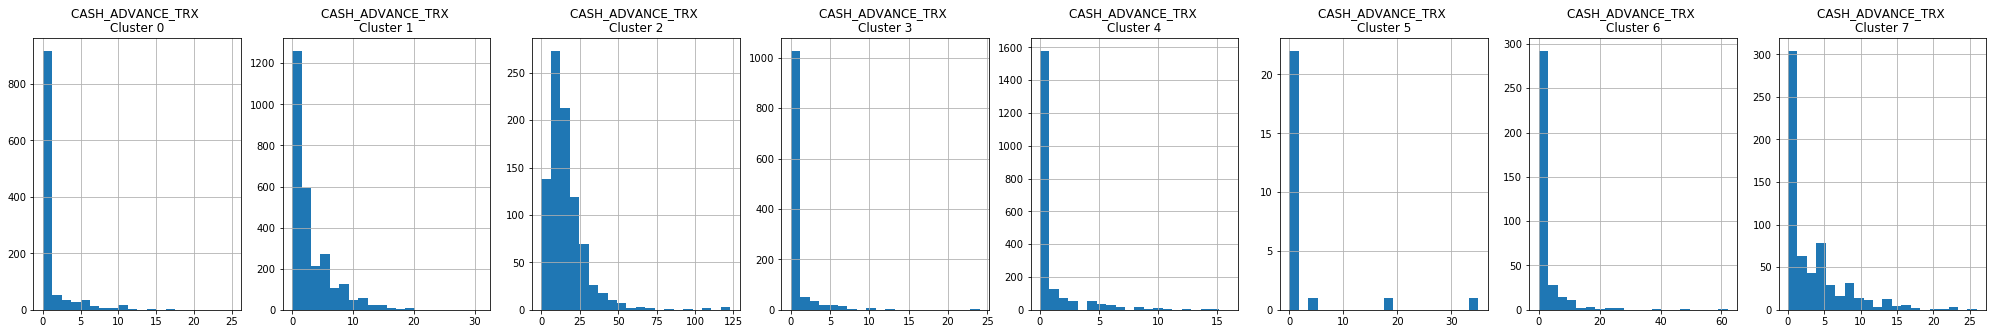

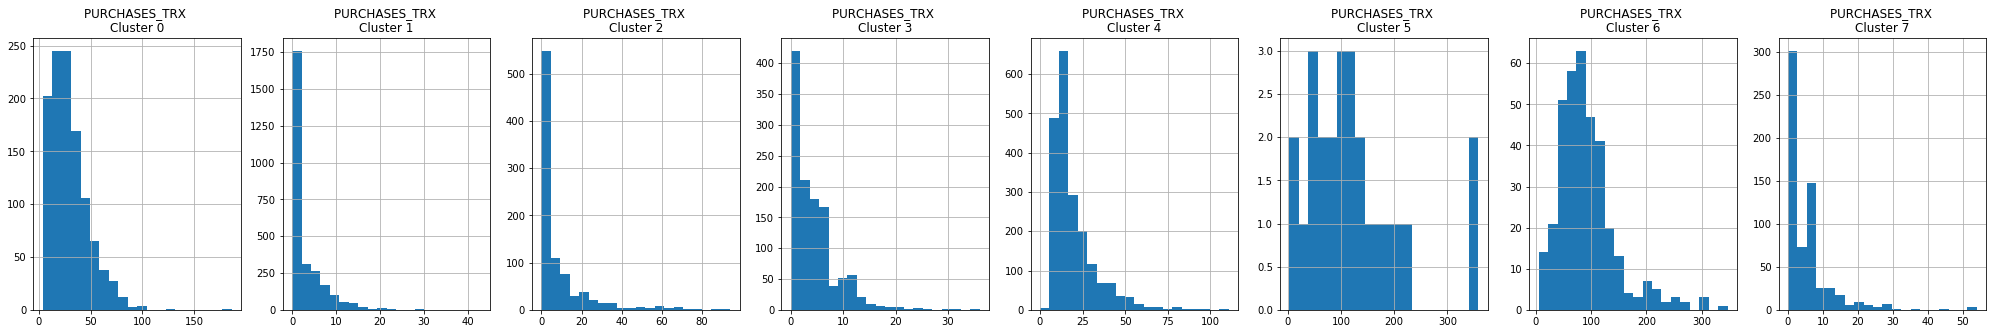

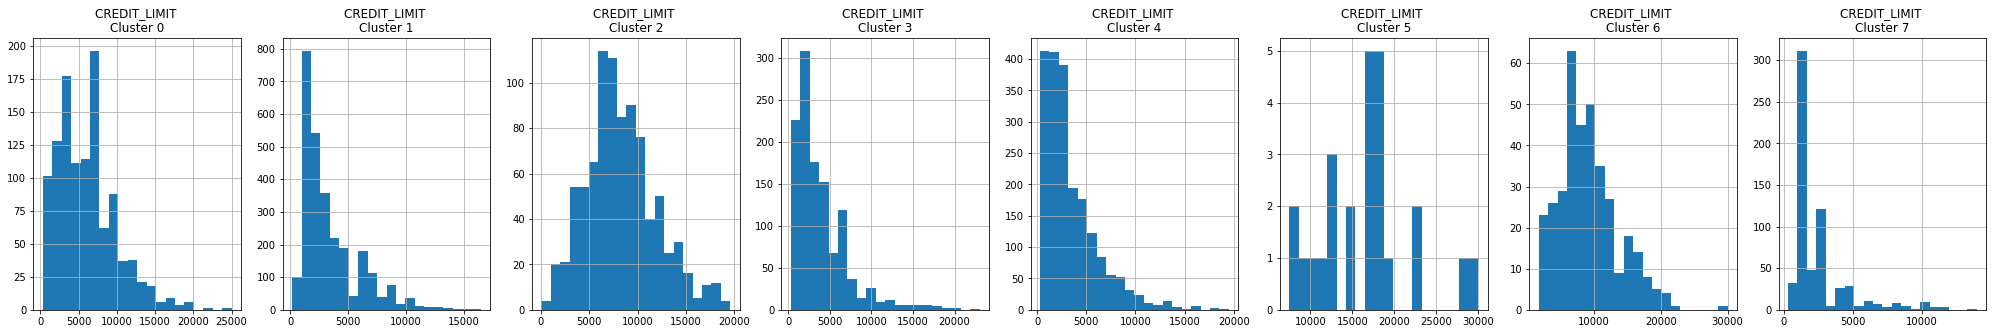

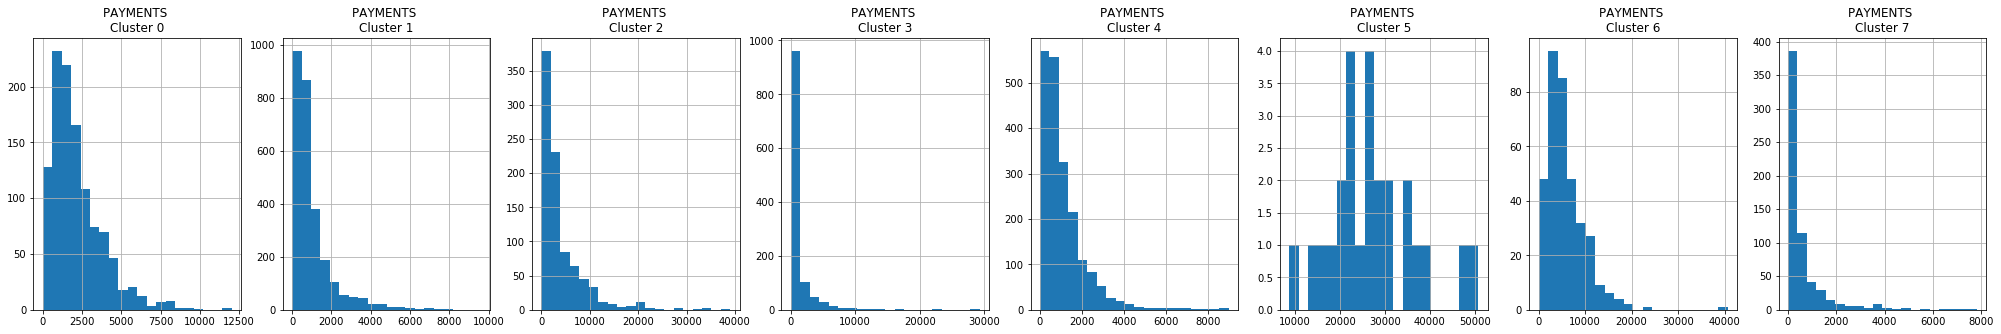

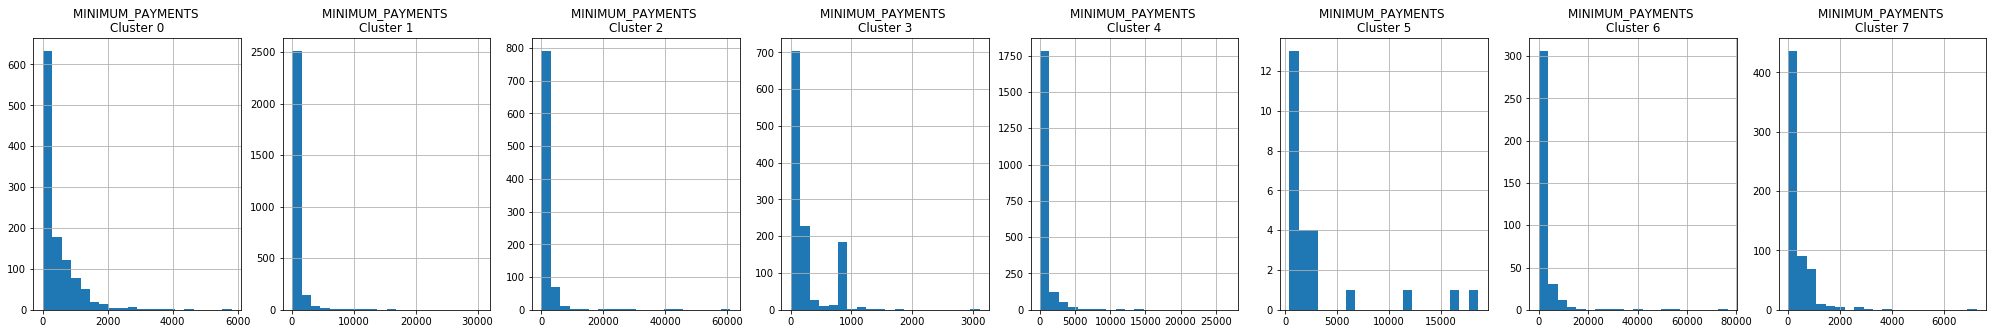

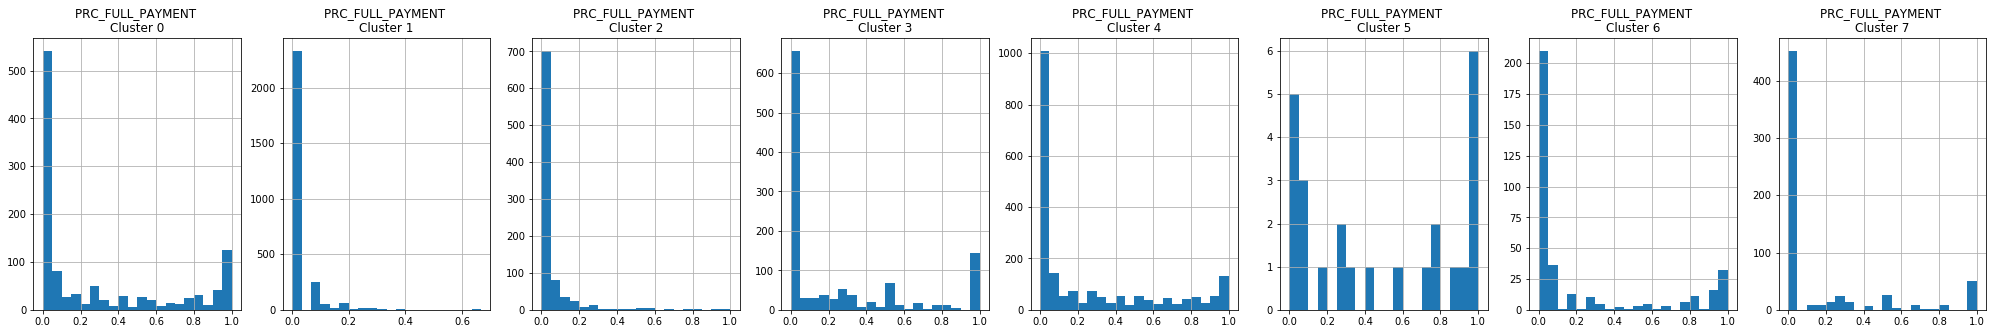

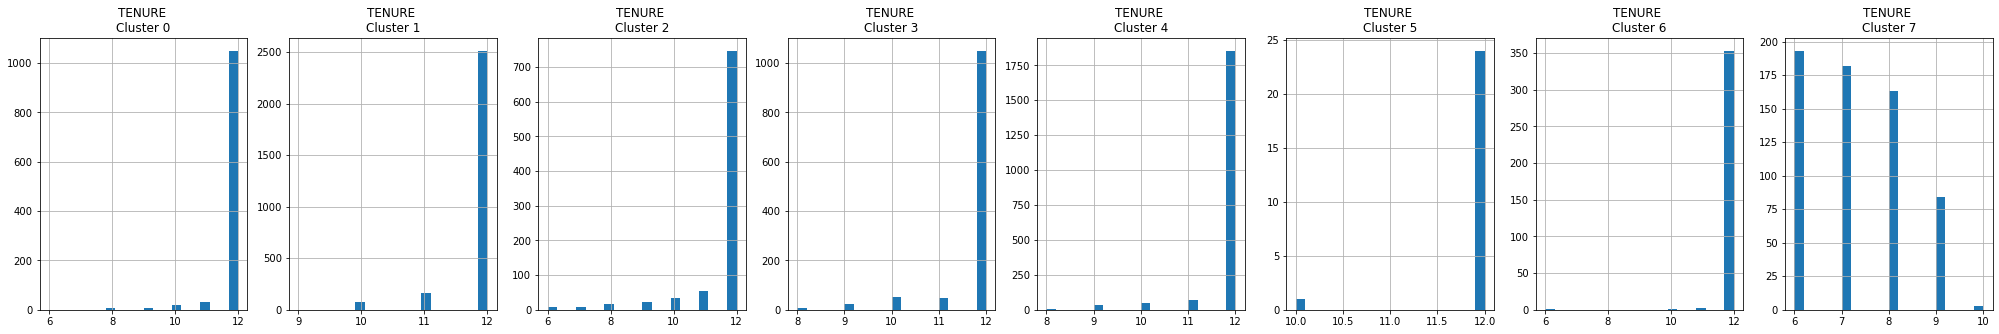

In [23]:
for i in df.columns:
  plt.figure(figsize=(35,5))
  for j in range(8):
    plt.subplot(1, 8, j + 1)
    cluster = df_cluster[df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{} \nCluster {}'.format(i, j))
  plt.show()

In [24]:
credit_ordered = df_cluster.sort_values(by = 'cluster')
credit_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
1805,2021.641161,1.0,363.18,363.18,0.00,0.000000,1.0,1.000000,0.000000,0.000000,0,13,2000.0,704.240770,795.859808,0.0,12,0
2382,5082.971064,1.0,1893.89,1543.89,350.00,970.708796,1.0,1.000000,0.416667,0.083333,1,27,9500.0,1607.021526,1480.266330,0.0,12,0
4019,196.967268,1.0,1915.07,1808.25,106.82,0.000000,1.0,1.000000,0.833333,0.000000,0,67,7500.0,1776.394323,175.483698,1.0,12,0
840,230.359954,1.0,2163.12,1383.12,780.00,0.000000,1.0,1.000000,0.333333,0.000000,0,23,4000.0,0.000000,864.206542,0.0,12,0
2384,320.353060,1.0,2542.61,696.08,1846.53,0.000000,1.0,0.583333,1.000000,0.000000,0,27,7500.0,3158.530331,192.272514,0.5,12,0


In [25]:
credit_ordered.to_csv('cluster.csv')

In [26]:
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(df_scaled)
principal_comp

array([[-1.68222052, -1.07645396],
       [-1.1382947 ,  2.50646596],
       [ 0.96968601, -0.38350698],
       ...,
       [-0.92620418, -1.81078517],
       [-2.33655351, -0.65797265],
       [-0.55642244, -0.40046499]])

In [27]:
pca_df = pd.DataFrame(data = principal_comp, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682221,-1.076454
1,-1.138295,2.506466
2,0.969686,-0.383507
3,-0.873627,0.043162
4,-1.599434,-0.688582


In [28]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis=1)

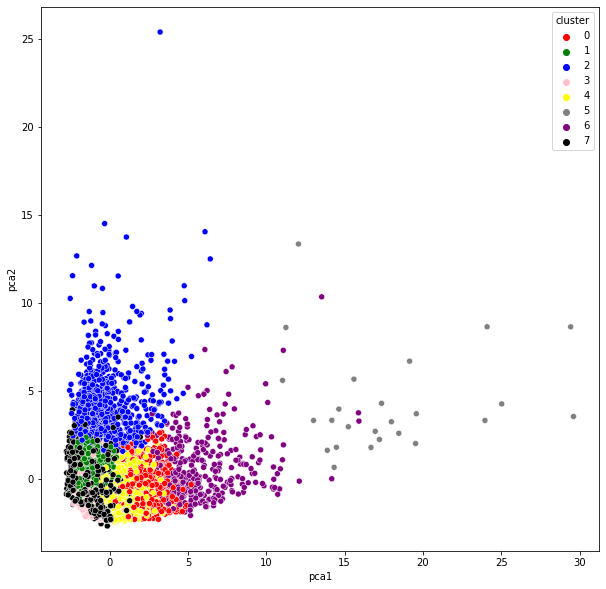

In [29]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple', 'black'])

In [30]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/frame

In [31]:
input_df = Input(shape=(17,))
x = Dense(500, activation='relu')(input_df)
x = Dense(2000, activation='relu')(x)

encoded = Dense(10, activation='relu')(x)

x = Dense(2000, activation='relu')(encoded)
x = Dense(500, activation='relu')(x)

Instructions for updating:
Colocations handled automatically by placer.


In [32]:
decoded = Dense(17)(x)

In [33]:
#auto encoder
autoencoder = Model(input_df, decoded)